In [43]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

##### Читаем датасет

In [44]:
df = pd.read_csv(os.path.join(os.path.abspath('..'), './glass.csv'))
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [45]:
df.shape

(214, 10)

In [46]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

##### Разделяем датафрйем на признаки и метки

In [47]:
labels = df.to_numpy('int')[:,-1]
features = df.to_numpy('float')[:,:-1]

##### Нормализация данных

In [71]:
features = minmax_scale(features)

##### Построение диаграммы рассеивания

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


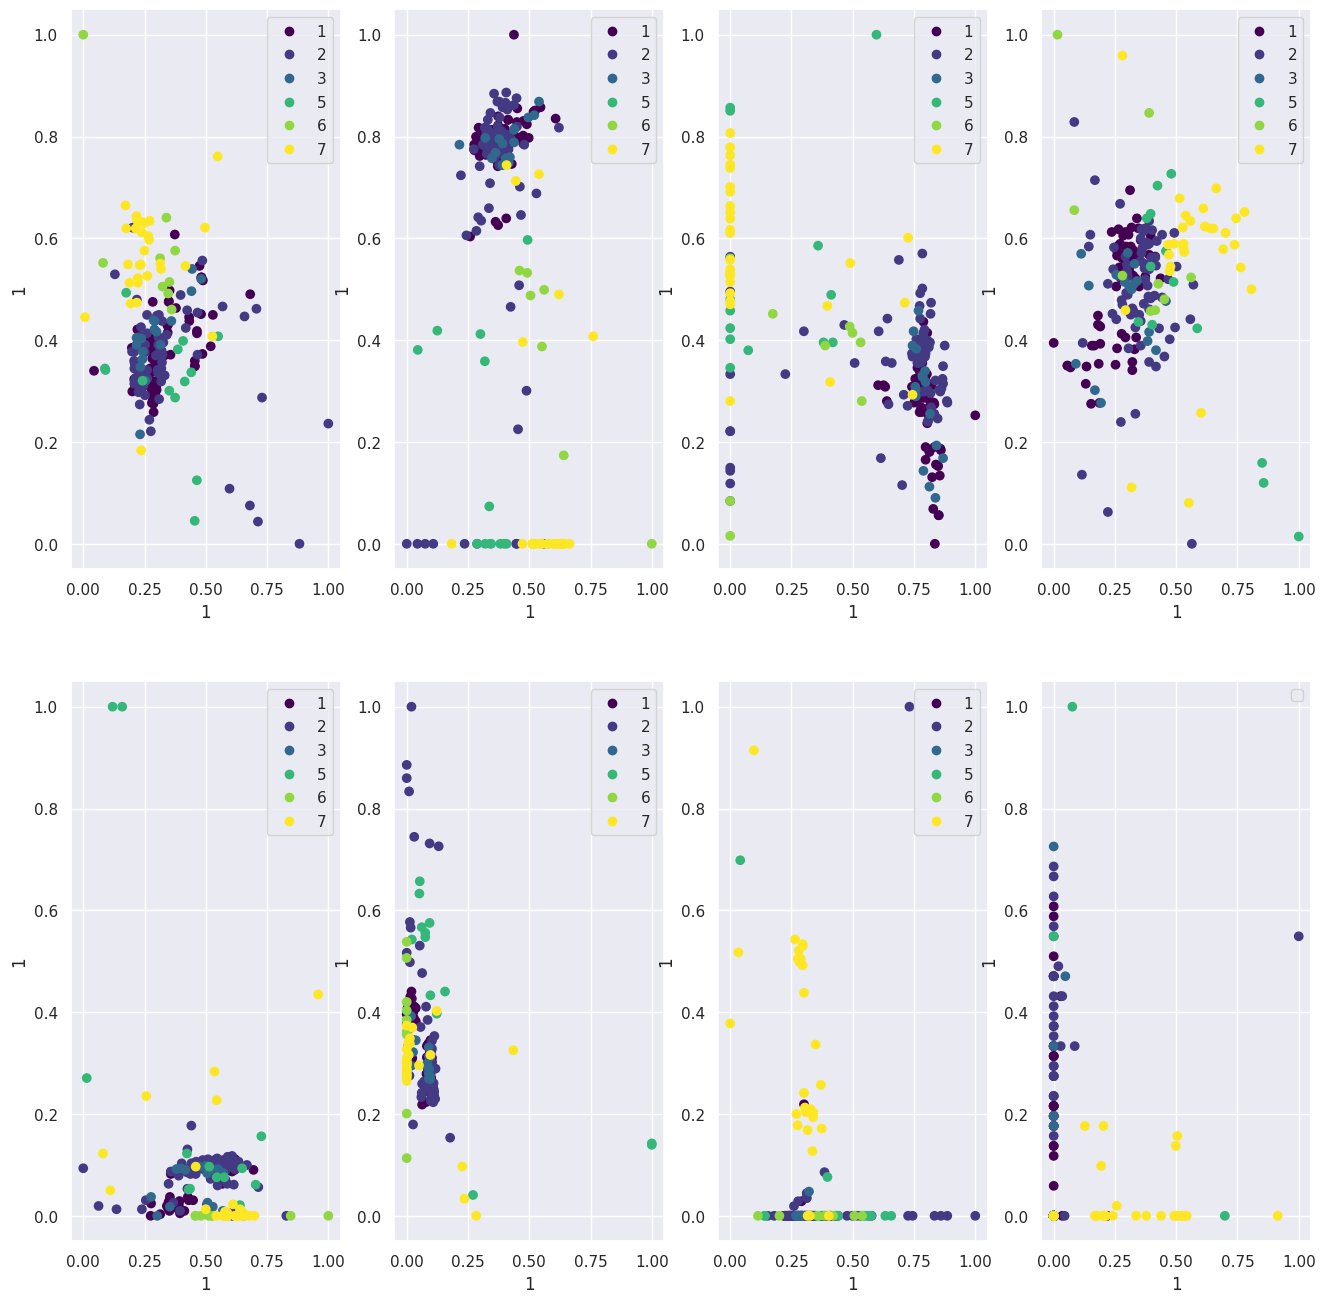

In [49]:
sns.set()
fig, axs = plt.subplots(2, 4)
fig.set_figwidth(16)
fig.set_figheight(16)
for i in range(features.shape[1] - 1):
    scatter = axs[i // 4, i % 4].scatter(features[:, i], 
                                        features[:, (i + 1)],
                                        c = labels, 
                                        cmap='viridis')
    axs[i // 4, i % 4].set_xlabel(labels[i])
    axs[i // 4, i % 4].set_ylabel(labels[i + 1])
    axs[i // 4, i % 4].legend(*scatter.legend_elements(), 
                                loc = 1)
                                
plt.legend(loc=1)

Понижение размерности методом главных компонент (Principal component analysis)

In [72]:
def get_components(features):
    for n_components in range(len(features[0])):
        pca = PCA(n_components=n_components)
        pca_features = pca.fit(features).transform(features)
        # print(sum(pca.explained_variance_ratio_))
        if sum(pca.explained_variance_ratio_) >= 0.85:
            return n_components

In [73]:
n = get_components(features=features)
pca = PCA(n_components=n)
pca_features = pca.fit(features).transform(features)

Можно заметить, что 4 компоненты объясняют > 85% данных
Объясненная дисперсия говорит нам, сколько информации (дисперсии) можно отнести к каждому из основных компонентов.В то время как мы можем конвертировать 9-мерное пространство в 4-мерное, мы теряем некоторую дисперсию (информацию) при этом.

In [74]:
pca.explained_variance_ratio_

array([0.45429569, 0.17990097, 0.12649459, 0.09797847])

In [75]:
pca.singular_values_

array([5.1049308 , 3.21245688, 2.69374532, 2.3707507 ])

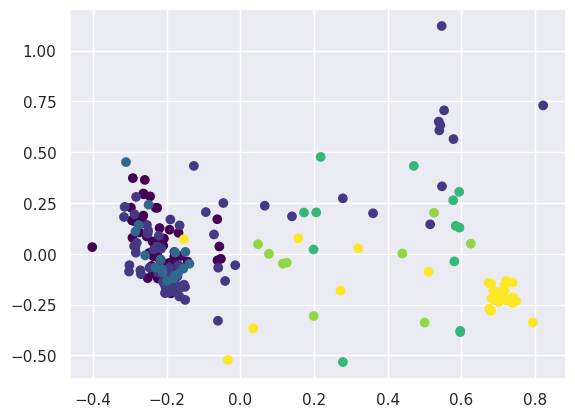

In [70]:
scatter = plt.scatter(pca_features[:, 0],
pca_features[:, 1], c = labels, cmap = 'viridis')